<a href="https://colab.research.google.com/github/shivavarma2001/homework-ML1/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

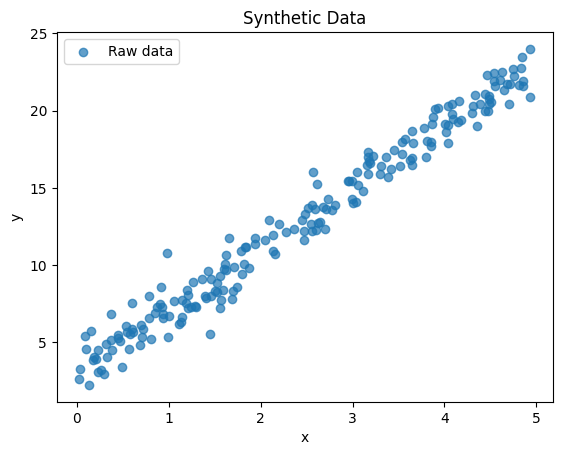

Closed-form solution:
Intercept = 3.1052, Slope = 3.9844

Gradient Descent solution:
Intercept = 3.1052, Slope = 3.9844


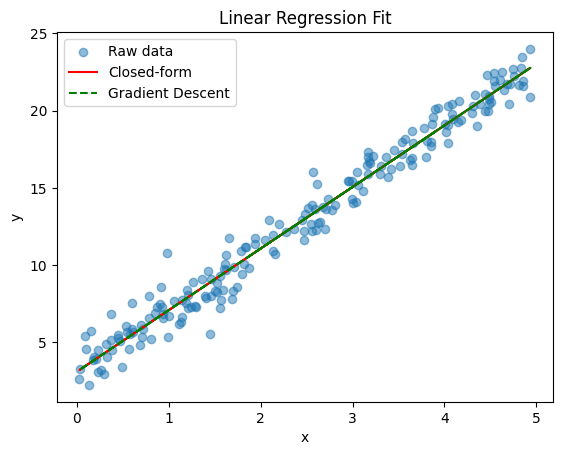

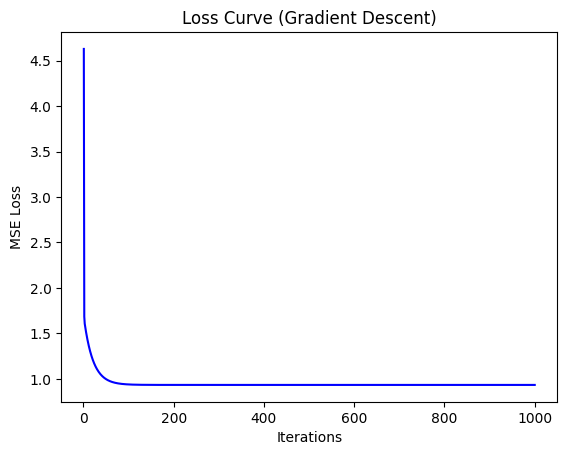


--- Comparison ---
Closed-form: Intercept = 3.1052, Slope = 3.9844
Gradient Descent: Intercept = 3.1052, Slope = 3.9844


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate synthetic dataset
np.random.seed(42)  # reproducibility
n_samples = 200
X = np.random.uniform(0, 5, n_samples)   # x ∈ [0, 5]
noise = np.random.normal(0, 1, n_samples)  # Gaussian noise
y = 3 + 4 * X + noise  # y = 3 + 4x + ε

# Reshape for matrix ops
X = X.reshape(-1, 1)
X_b = np.c_[np.ones((n_samples, 1)), X]  # add bias column

# Plot raw data
plt.scatter(X, y, alpha=0.7, label="Raw data")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic Data")
plt.legend()
plt.show()

# 2. Closed-form solution (Normal Equation)
theta_closed = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
intercept_closed, slope_closed = theta_closed
print("Closed-form solution:")
print(f"Intercept = {intercept_closed:.4f}, Slope = {slope_closed:.4f}")

# Line for plotting
y_pred_closed = X_b.dot(theta_closed)

# 3. Gradient Descent implementation
def gradient_descent(X_b, y, lr=0.05, n_iter=1000):
    m = len(y)
    theta = np.zeros(2)  # [intercept, slope]
    losses = []

    for i in range(n_iter):
        gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
        theta -= lr * gradients

        # Compute MSE
        mse = np.mean((X_b.dot(theta) - y) ** 2)
        losses.append(mse)

    return theta, losses

theta_gd, losses = gradient_descent(X_b, y, lr=0.05, n_iter=1000)
intercept_gd, slope_gd = theta_gd
print("\nGradient Descent solution:")
print(f"Intercept = {intercept_gd:.4f}, Slope = {slope_gd:.4f}")

y_pred_gd = X_b.dot(theta_gd)

# 4. Comparison plots
plt.scatter(X, y, alpha=0.5, label="Raw data")
plt.plot(X, y_pred_closed, color="red", label="Closed-form")
plt.plot(X, y_pred_gd, color="green", linestyle="--", label="Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

# Loss curve for Gradient Descent
plt.plot(range(1, len(losses) + 1), losses, color="blue")
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Loss Curve (Gradient Descent)")
plt.show()

# 5. Comparison result
print("\n--- Comparison ---")
print(f"Closed-form: Intercept = {intercept_closed:.4f}, Slope = {slope_closed:.4f}")
print(f"Gradient Descent: Intercept = {intercept_gd:.4f}, Slope = {slope_gd:.4f}")